# Goal
Determine the most effective sales strategy for the new office stationery product line.

## Business Questions
1. How many customers per method?

2. What does revenue distribution look like overall and by method?

3. Revenue trends over time by method?

4. Which method is most effective, considering effort vs. revenue?

In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Read csv file into dataframe

df = pd.read_csv('product_sales.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB


In [3]:
print(df.describe(include='all'))

                week sales_method  ... nb_site_visits       state
count   15000.000000        15000  ...   15000.000000       15000
unique           NaN            5  ...            NaN          50
top              NaN        Email  ...            NaN  California
freq             NaN         7456  ...            NaN        1872
mean        3.098267          NaN  ...      24.990867         NaN
std         1.656420          NaN  ...       3.500914         NaN
min         1.000000          NaN  ...      12.000000         NaN
25%         2.000000          NaN  ...      23.000000         NaN
50%         3.000000          NaN  ...      25.000000         NaN
75%         5.000000          NaN  ...      27.000000         NaN
max         6.000000          NaN  ...      41.000000         NaN

[11 rows x 8 columns]


In [4]:
df.head()

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois


In [5]:
# Check to see if there are any null values
df.isna().any()

week                 False
sales_method         False
customer_id          False
nb_sold              False
revenue               True
years_as_customer    False
nb_site_visits       False
state                False
dtype: bool

# Data Validation

### *week:* should only include values from 1 - 6 (weeks since launch)

In [6]:
df["week"].value_counts()

1    3721
4    2575
5    2574
2    2491
3    2411
6    1228
Name: week, dtype: int64

### *sales_method:* should be strings (email, call, email+call)

In [7]:
df["sales_method"].value_counts()

Email           7456
Call            4962
Email + Call    2549
em + call         23
email             10
Name: sales_method, dtype: int64

In [8]:
# Change values in sales_method column for ease
df['sales_method'] = df['sales_method'].replace({'em + call': 'Email + Call'})

# Lower case all string values for ease
df['sales_method'] = df['sales_method'].str.lower()

In [9]:
df["sales_method"].value_counts()

email           7466
call            4962
email + call    2572
Name: sales_method, dtype: int64

### *customer_id:* should be unique

In [10]:
df['customer_id'].unique()

array(['2e72d641-95ac-497b-bbf8-4861764a7097',
       '3998a98d-70f5-44f7-942e-789bb8ad2fe7',
       'd1de9884-8059-4065-b10f-86eef57e4a44', ...,
       '839653cb-68c9-48cb-a097-0a5a3b2b298b',
       'e4dad70a-b23b-407c-8bd3-e32ea00fae17',
       '4e077235-7c17-4054-9997-7a890336a214'], dtype=object)

### *nb_sold:* check for non positive values

In [11]:
print("Min Value: ", df['nb_sold'].min(), "Max Value: ", df['nb_sold'].max())

Min Value:  7 Max Value:  16


### *revenue:* From the info above, we know there are null values

In [12]:
# Check if there are negative values
print(df['revenue'].min())

32.54


In [13]:
# Create dictionary from rows where revenue is NOT null
revenue_lookup = (
    df[df['revenue'].notnull()]
    .groupby('nb_sold')['revenue']
    .mean()
    .round(2)
    .to_dict()
)

revenue_lookup

{7: 35.09,
 8: 64.53,
 9: 79.17,
 10: 91.03,
 11: 88.44,
 12: 170.16,
 13: 125.85,
 14: 91.64,
 15: 226.83,
 16: 234.14}

In [14]:
# Fill missing revenue using map
df['revenue'] = df['revenue'].fillna(df['nb_sold'].map(revenue_lookup))

In [15]:
df['revenue'].isna().sum()

0

### *years_as_customer:* should be positive integers and max value should be 41, considering that the company was founded in 1984

In [16]:
print("Min Value: ", df['years_as_customer'].min(), "Max Value: ", df['years_as_customer'].max())

Min Value:  0 Max Value:  63


In [17]:
df['years_as_customer'] = df['years_as_customer'].clip(upper=41)

In [18]:
print(df['years_as_customer'].min(), df['years_as_customer'].max())

0 41


### *nb_site_visits:* should be positive integers

In [19]:
print(df['nb_site_visits'].min(), df['nb_site_visits'].max())

12 41


### *state:* Check if there are inconsistent naming

In [20]:
df['state'].unique()

array(['Arizona', 'Kansas', 'Wisconsin', 'Indiana', 'Illinois',
       'Mississippi', 'Georgia', 'Oklahoma', 'Massachusetts', 'Missouri',
       'Texas', 'New York', 'Maryland', 'California', 'Tennessee',
       'Pennsylvania', 'North Dakota', 'Florida', 'Michigan',
       'North Carolina', 'Hawaii', 'Colorado', 'Louisiana', 'Virginia',
       'New Mexico', 'Arkansas', 'Alaska', 'Oregon', 'New Hampshire',
       'Ohio', 'New Jersey', 'Connecticut', 'Iowa', 'Montana',
       'Washington', 'Kentucky', 'Alabama', 'Nebraska', 'South Carolina',
       'Minnesota', 'South Dakota', 'Delaware', 'Maine', 'Utah',
       'West Virginia', 'Vermont', 'Rhode Island', 'Nevada', 'Idaho',
       'Wyoming'], dtype=object)

In [21]:
df.isna().any()

week                 False
sales_method         False
customer_id          False
nb_sold              False
revenue              False
years_as_customer    False
nb_site_visits       False
state                False
dtype: bool

# EDA

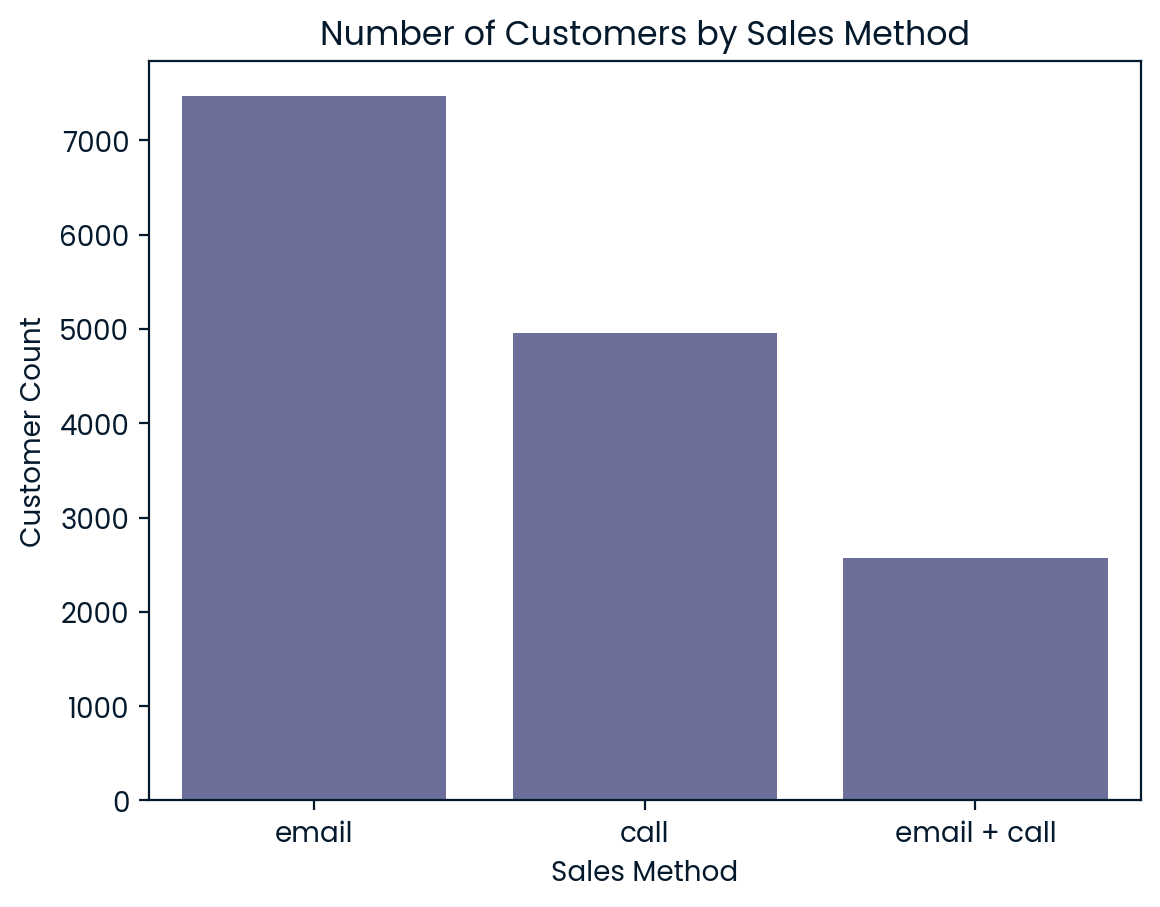

In [22]:
# How many customers were there for each approach?

sns.countplot(data=df, x='sales_method', order=['email', 'call', 'email + call'])
plt.title("Number of Customers by Sales Method")
plt.xlabel("Sales Method")
plt.ylabel("Customer Count")
plt.show()

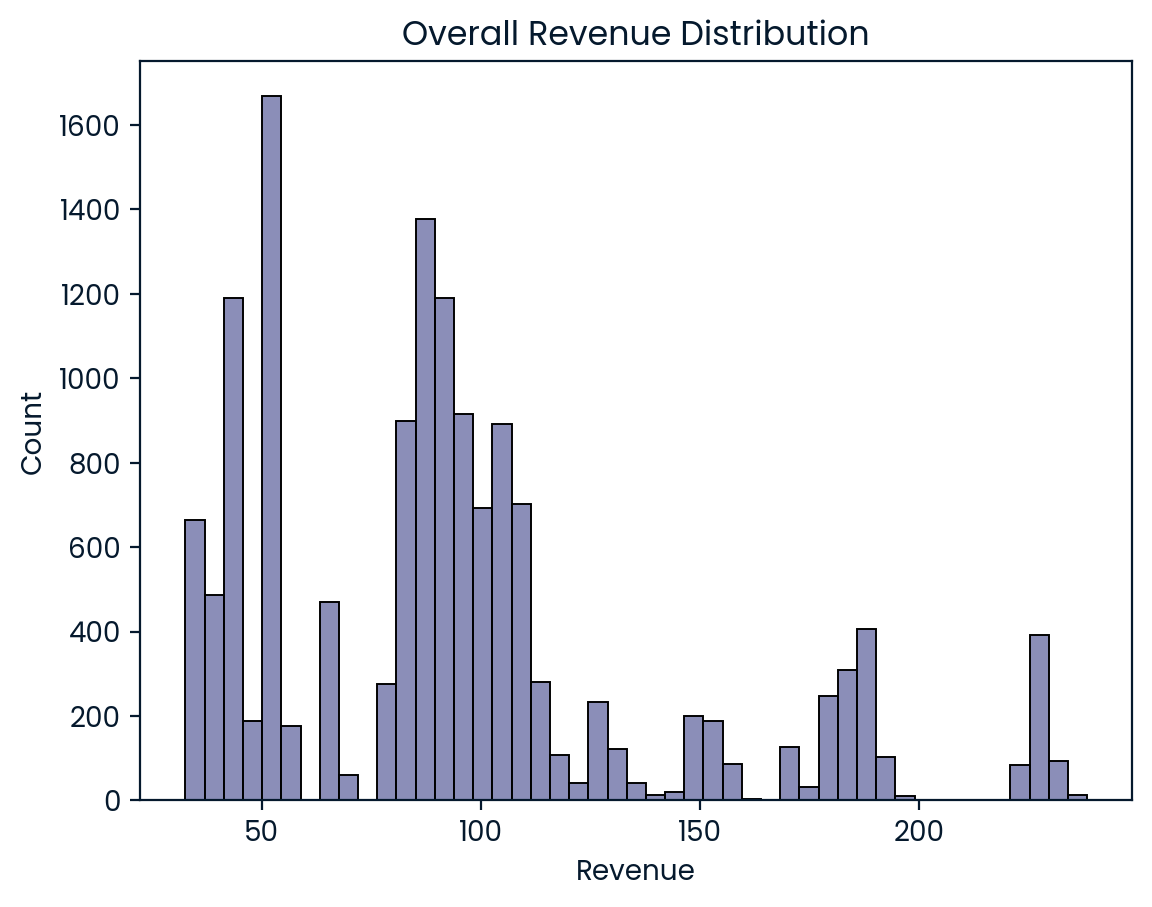

In [23]:
# What does the spread of the revenue look like overall? And for each method?

# Histogram of overall revenue
sns.histplot(x=df['revenue'])
plt.title("Overall Revenue Distribution")
plt.xlabel("Revenue")
plt.ylabel("Count")
plt.show()

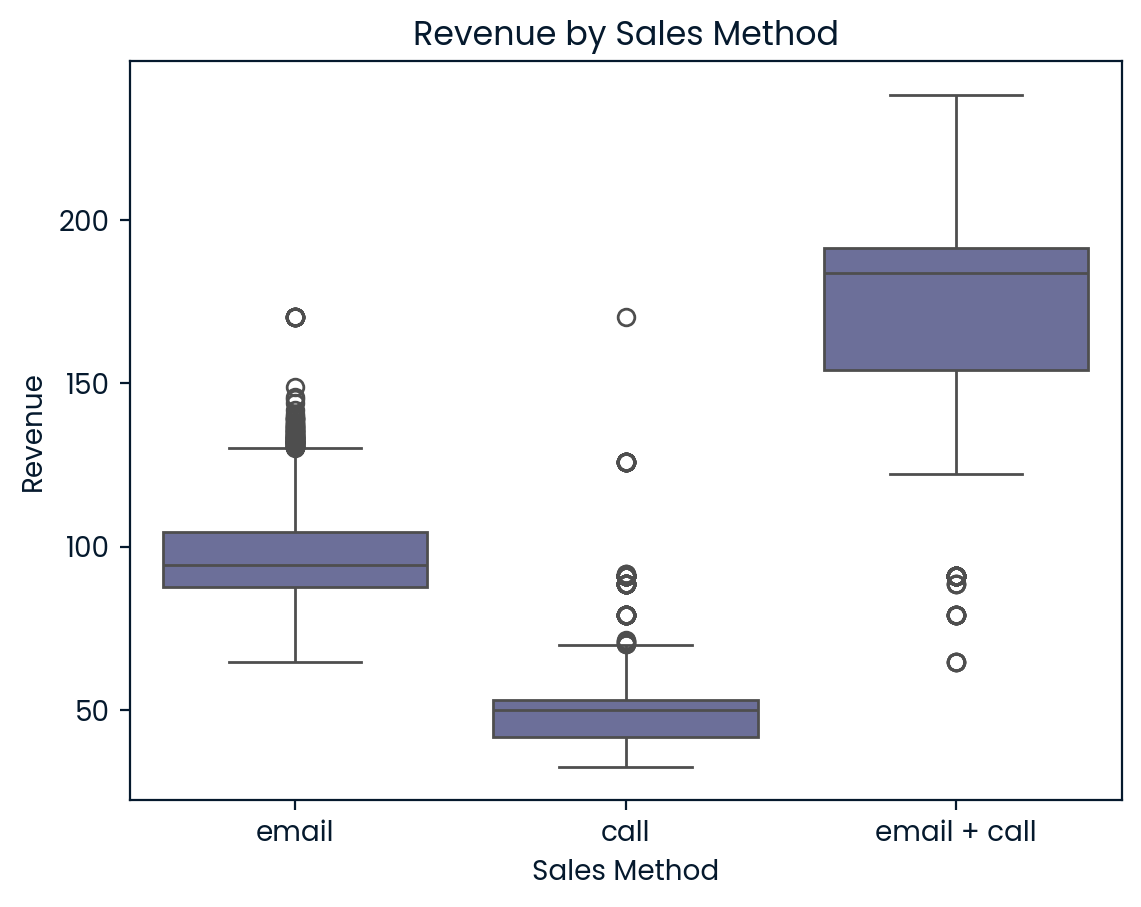

In [24]:
# By method
sns.boxplot(data=df, x='sales_method', y='revenue', order=['email', 'call', 'email + call'])
plt.title("Revenue by Sales Method")
plt.xlabel("Sales Method")
plt.ylabel("Revenue")
plt.show()

In [25]:
print(df.groupby('sales_method')['revenue'].describe())

               count        mean        std  ...      50%      75%     max
sales_method                                 ...                          
call          4962.0   48.861709  11.529866  ...   49.850   52.940  170.16
email         7466.0   96.333575  12.041346  ...   94.435  104.600  170.16
email + call  2572.0  180.297236  34.154786  ...  183.700  191.275  238.32

[3 rows x 8 columns]


In [26]:
# Was there any difference in revenue over time for each of the methods?

# Group by week and sales_method
revenue_over_time = df.groupby(['week', 'sales_method'])['revenue'].mean().reset_index()

print(revenue_over_time)

    week  sales_method     revenue
0      1          call   35.382902
1      1         email   86.636384
2      1  email + call  122.689324
3      2          call   44.833714
4      2         email   99.488197
5      2  email + call  145.028700
6      3          call   42.731452
7      3         email   92.095035
8      3  email + call  144.632841
9      4          call   53.040299
10     4         email  107.793051
11     4  email + call  179.129051
12     5          call   54.500010
13     5         email  107.715518
14     5  email + call  182.033583
15     6          call   68.734687
16     6         email  130.386497
17     6  email + call  227.629897


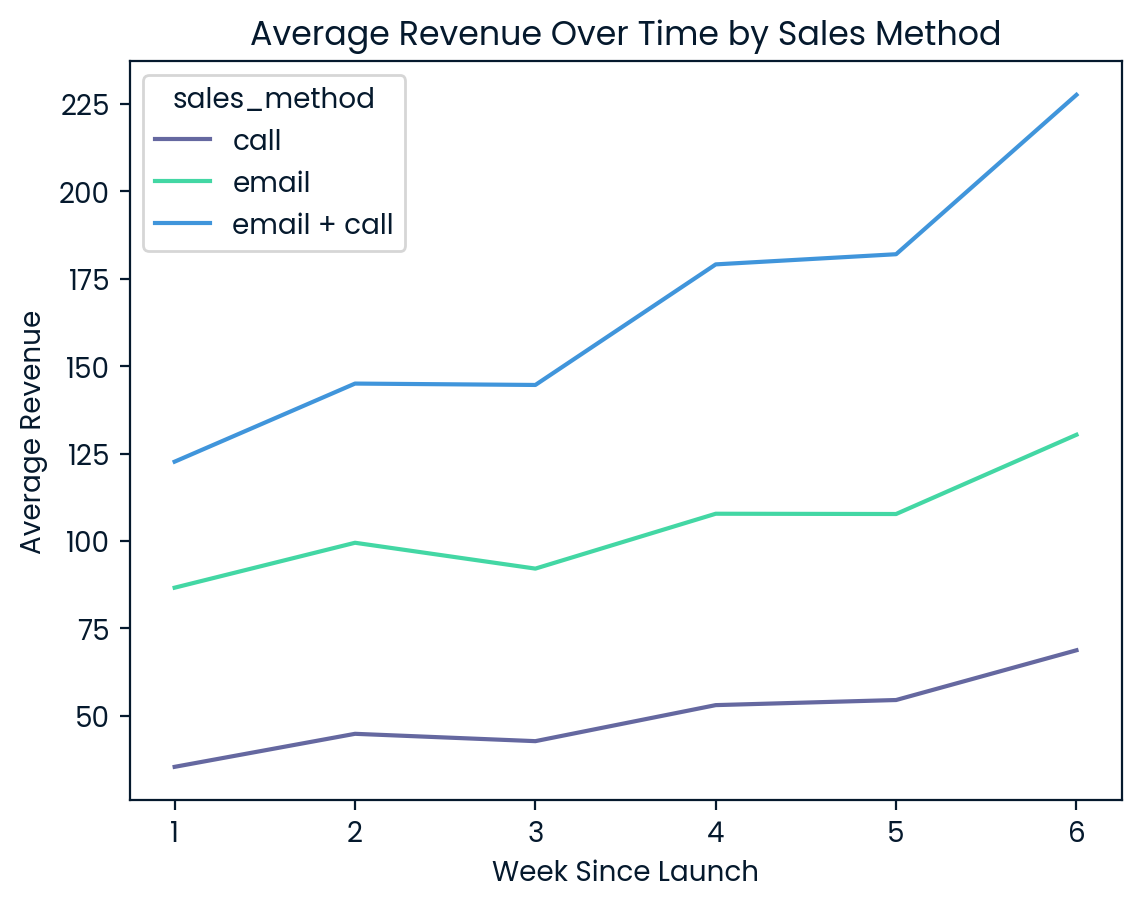

In [27]:
sns.lineplot(data=revenue_over_time, x='week', y='revenue', hue='sales_method')
plt.title("Average Revenue Over Time by Sales Method")
plt.xlabel("Week Since Launch")
plt.ylabel("Average Revenue")
plt.show()

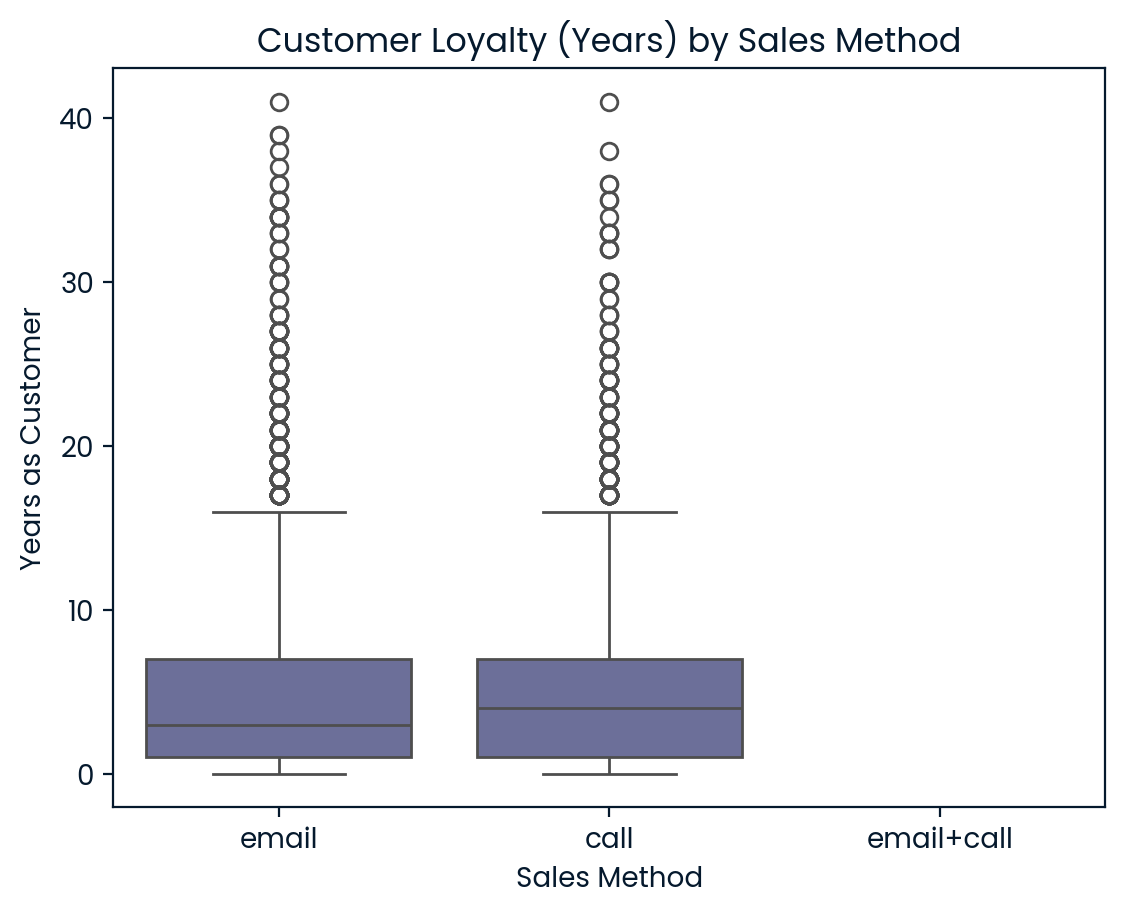

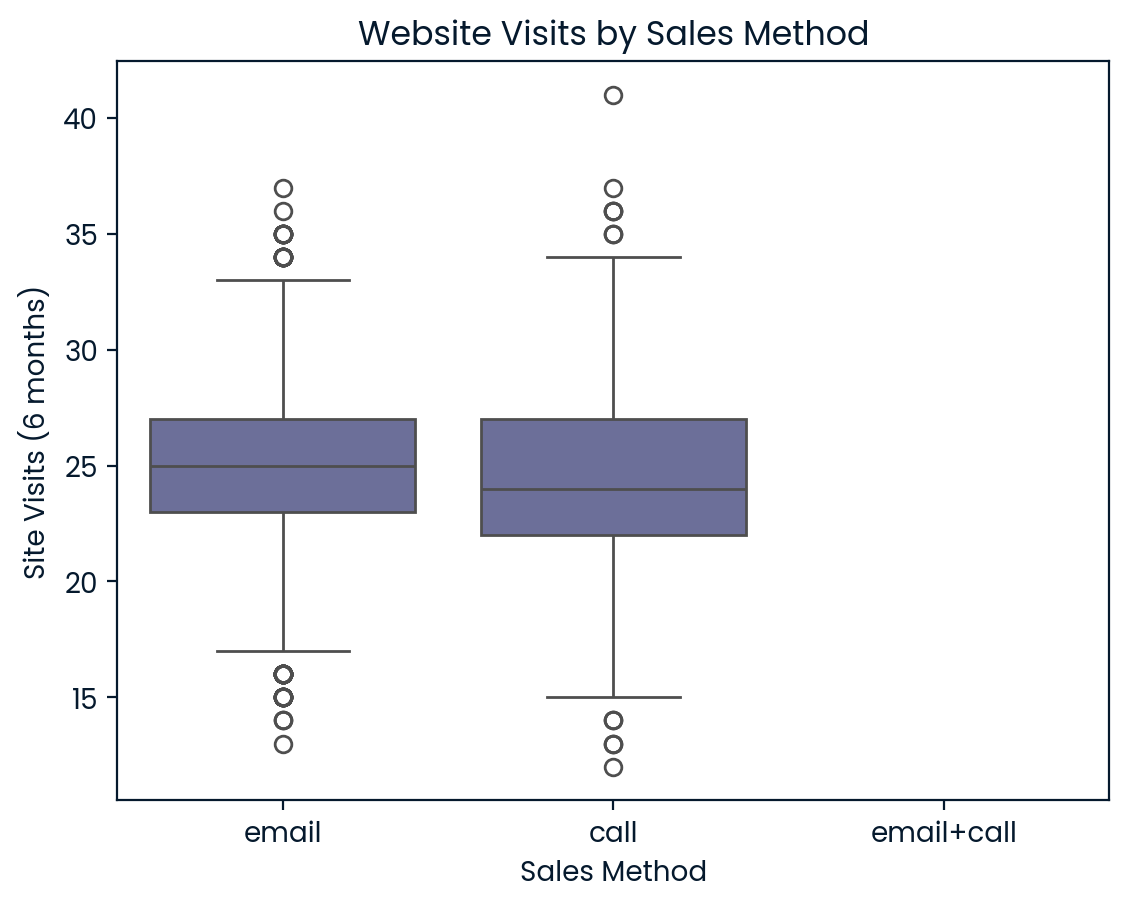

In [28]:
# Which method is most effective, considering effort vs. revenue?

# Years as customer
sns.boxplot(data=df, x='sales_method', y='years_as_customer', order=['email', 'call', 'email+call'])
plt.title("Customer Loyalty (Years) by Sales Method")
plt.xlabel("Sales Method")
plt.ylabel("Years as Customer")
plt.show()

# Site visits
sns.boxplot(data=df, x='sales_method', y='nb_site_visits', order=['email', 'call', 'email+call'])
plt.title("Website Visits by Sales Method")
plt.xlabel("Sales Method")
plt.ylabel("Site Visits (6 months)")
plt.show()